안녕하세요 Team.Zoo입니다.😀

벌써 데이크루 활동의 반이 지났는데요!
오늘은 5주차인  비지도 학습 기반의 머신러닝 기법(2)에 대하여 소개해드리도록 하겠습니다.

이번 시간에는 저번 차원 축소 기법 설명에 이어 PCA와 Isomap, MDS 으로 차원 축소 기법 3가지를 집중적으로 다루어보았습니다.

차원 축소는 성능이 저하될 우려가 심한 깊은 데이터를 방지해주는 효과를 지니는데요!
피처 증가시 상관관계가 높아져 다중공선성 문제가 과적합되고 예측이 저하되는 문제를 해결해주는 기법입니다. 오늘은 이 기법의 대표인 PCA와 주성분 분석(PCA)의 확장인 Isomap , 다차원 스케일링인 MDS에 대해서 자세히 소개해드리니 끝까지 봐주세요 ! 🙂


# 이전 게시물

[1편. 이상탐지 너 뭐야?](https://dacon.io/codeshare/4758)  
[2편. 신용카드 사기 탐지(1부)](https://dacon.io/codeshare/4833)  
[3편. 신용카드 사기 탐지(2부)](https://dacon.io/codeshare/4853)  
[4편. 비지도 학습 기반의 머신러닝 기법(1부)](https://dacon.io/codeshare/4874)  

## CONTENTS

#### 1.Dimension Reduction Introduction

#### 2.PCA
- iris data
- mnist data

#### 3.SWISS-ROLL data
- small datasets
- big datasets

#### 4.SWISS-ROLL data - ISOMAP 
- small datasets
- big datasets

#### 5.SWISS-ROLL data - MDS
- small datasets
- big datasets

### 1.Dimension Reduction Introduction

**차원 축소**는 비지도학습의 큰 축이자 원본 데이터를 저차원의 부분공간으로 투영하여 데이터 축소하는 기법입니다.

10차원 이상의 데이터가 주어진 경우, 2-3차원 데이터 부분 공간으로
투영하여 축소하며, 차원이 증가할수록 데이터 포인트 거리가 기하급수적으로 멀어지는 것을 방지해줍니다.

따라서 피처 증가시 피처간 상관관계가 높아져 다중공선성 문제 과적합이나 예측이 저하되는 문제를 해결해준다는 점에서 성능이 저하될 우려가 적습니다.

**차원 축소 기법의 결과**
기법 적용시, 다차원 피처를 피처 수로 줄이다 보면 직관적 해석 가능합니다.
데이터 크기가 감소하였기 때문에 학습 시간이 감소하며
차원 축소 기법으로 시각적 인지가 가능하다는 점에서 변수 간 차이를 확연하게 구분할 수 있습니다


**차원 축소 방법**
차원 축소 방법은 2가지입니다.

1.피처 선택(feature selection):
- 특정 피처에 종속성이 강한 불필요한 피처 제거한 후
특징 잘 살릴 수 있는 피처를 선택하는 방법입니다.

2.피처 추출(feature extraction):
- 기존 피처를 저차원으로 압축시켜 추출하는 방법으로, 새롭게 추출이 된 중요 특성은 기존 피처가 압축된 것이지만, 기존 피처와 다르게 새로운 값이 됩니다.
- 함축적 설명이 가능합니다.
- 또 다른 공간으로 매핑하여 추출한다는 장점이 존재합니다.

### 2.PCA 

다음으로는 PCA 기법입니다. 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법으로 분산을 최대한 보존하는 동시 직교하는 축을 찾아 변환할 수 있는 특징이 있습니다. iris data와 mnist data을 활용하여 pca 기법을 실습해보았습니다😁

#### iris data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#dataframe, iris data
import pandas as pd
from sklearn.datasets import load_iris

#시각화용 패키지 
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

In [ ]:
# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()
print(iris.data.shape)
# 기존 numpy dataset-> dataframe형태로 변환
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


pca로 전환하기 위해서는 먼저 표준화를 진행해야합니다.
사이킷런에 제공되어 있는 StandardScaler을 활용하였습니다.

In [ ]:
from sklearn.preprocessing import StandardScaler

#평균이 0 변환 표준화 진행하기 :StandardScaler
scaler = StandardScaler()
result = scaler.fit_transform(data)
data_scaled = pd.DataFrame(result, columns=iris.feature_names)
data_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


2차원으로 압축하여 pca 기법을 사용하였습니다.
이를 dataframe으로 변환하여 결과를 만들었습니다.

In [ ]:
#사이킷런 : PCA기법 지원
from sklearn.decomposition import PCA

#2차원 압축
pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)

#결과
result = pd.DataFrame(result, columns=["x", "y"])
result

,x,y
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


pca기법의 특징 중 하나는 저차원으로 차원 축소가 가능하다는 점에서 시각화가 가능하다는 것인데요!

column x,y을 토대로 2D공간에 따라 데이터를 시각화해보았습니다

특징 분리가 잘 되는 것을 볼 수 있습니다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nanum Gothic'] not found. Falling back to DejaVu Sans.


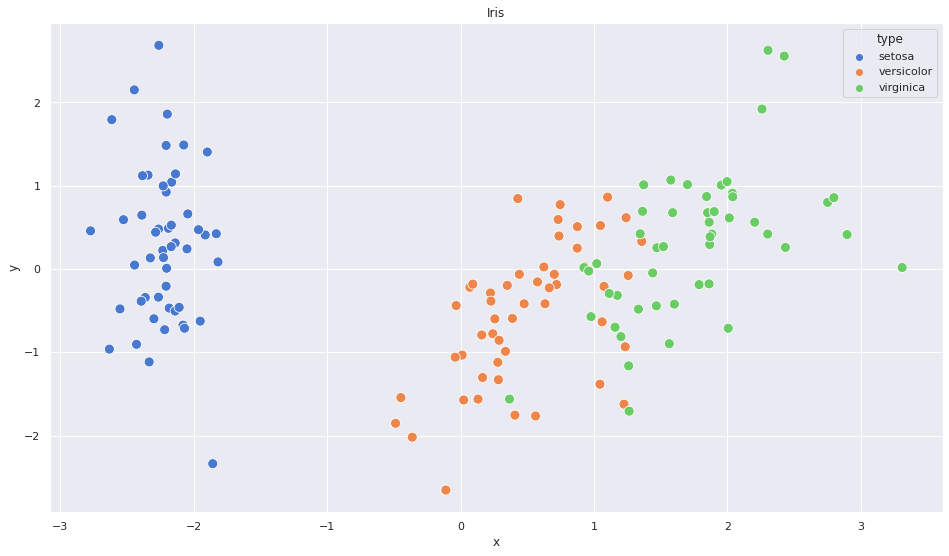

In [ ]:
#분류 column 생성
target = pd.DataFrame(iris.target, columns=['type'])
target['type'] = target['type'].apply(lambda x: iris.target_names[x])
merged = pd.concat([result, target], axis=1)



# 시각화
plt.figure(figsize=(16, 9)) #그림 사이즈 
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['type'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('Iris') #제목 붙이
plt.show()

#### mnist data

다음은 mnist data입니다.


핸즈온 비지도 학습 교재에 수록되어 있는 코드로 위 교재에서 데이터를 다운받아 실습을 진행하였습니다.

In [ ]:
# 라이브러리 불러오기

'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''데이터 준비 및 모델 평가 관련 라이브러리'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
# 데이터 셋 로드
# Load the datasets


f = gzip.open('/content/drive/MyDrive/대외활동/데이크루/4주차/mnist.pkl.gz', 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

In [ ]:
# 데이터 셋으로부터 판다스 데이터 프레임 만들기
train_index = range(0,len(X_train))
validation_index = range(len(X_train), \
                         len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), \
                   len(X_train)+len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [ ]:
def one_hot(series):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(series)+1))
    return label_binarizer.transform(series)

In [ ]:

def reverse_one_hot(originalSeries, newSeries):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(originalSeries)+1))
    return label_binarizer.inverse_transform(newSeries)

In [ ]:
# 레이블에 대한 원-핫 벡터 생성
y_train_oneHot = one_hot(y_train)
y_validation_oneHot = one_hot(y_validation)
y_test_oneHot = one_hot(y_test)

PCA 알고리즘 하이퍼 파라미터를 설정하고 훈련 데이터를 변환하고 적합하여 다음과 같은 주성분을 생성하였습니다

In [ ]:
# 주성분 분석
from sklearn.decomposition import PCA

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

차원을 전혀 줄이지 않은 상황입니다.
그렇기 때문에 주성분 784개로 추출한 원본데이터의 분산/정보는 100프로가 되어야합니다. 확인하여 분산 비율을 보도록 하겠습니다.

99.99999..%로 100%임을 확인할 수 있습니다!

In [ ]:
# 784개의 주성분으로 추출한 원본 데이터의 분산 비율

print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  1.0000000252108534


주성분 784개의 중요도는 각기 다릅니다. 첫번째 주성분들의 중요도는 다음과 같이 요약이 됩니다. 

- 전체 중에 처음 10개의 주성분이 총 분산의 50%을 잡아냅니다.
- 처음 100개 주성분이 총 분산의 90% 이상을 잡아냅니다.
- 처음 300개 주성분이 총 분산의 99%를 잡아냅니다.

In [ ]:
# X개의 주성분으로 추출한 원본 데이터의 분산 비율

importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.48876244]
Variance Captured by First 20 Principal Components:  [0.6439803]
Variance Captured by First 50 Principal Components:  [0.824861]
Variance Captured by First 100 Principal Components:  [0.91465855]
Variance Captured by First 200 Principal Components:  [0.96650076]
Variance Captured by First 300 Principal Components:  [0.9862489]


PCA을 사용하면 대부분의 핵심 정보를 유지하면서 원본 데이터의 차원을 크게 줄일 수가 있는데요!

계산 리소스도 줄어들며 데이터 포인트를 공간에서 더욱 쉽게 분리할 수도 있습니다

이를 입증하기 위해 2차원 그래프로 시각적으로 나타내보았습니다.

이처럼 PCA기법은 가독성있게 plot으로 표현이 가능한 동시 적은 변수로 데이터 정보를 효율적으로 전달할 수 있는 장점이 있습니다


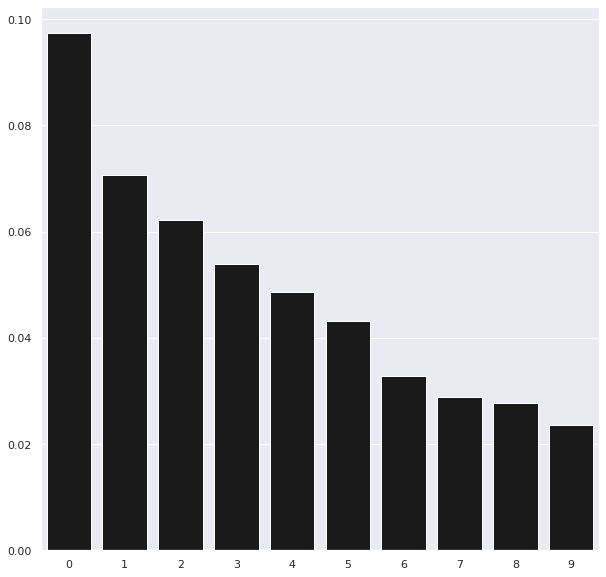

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:9],color='k')

##### scatter plot : PCA기법 전 후 차이

다음은 scatter plot입니다.

**PCA 적용** 결과로
상위 2개 주성분만 사용하여 전반적으로 비슷한 데이터들이 서로 더 가까워지도록 데이터 포인트들을 잘 분리하였습니다.

In [ ]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

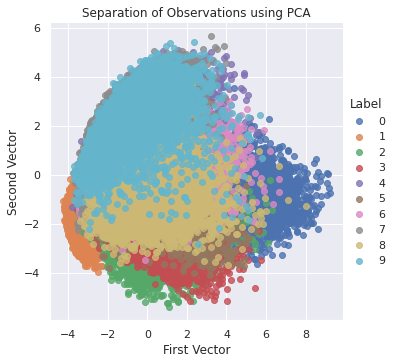

In [ ]:
scatterPlot(X_train_PCA, y_train, "PCA")

앞의 scatter plot과 다르게 이 plot은 **pca기법 적용 전** 결과입니다.

 원본 데이터의 784개 데이터셋에서 가장 중요한 피처 2개를 선정하여 2차원 산점도를 그려보았지만 잘 분리되지는 않습니다

Text(0.5, 1.0, 'Separation of Observations Using Original Feature Set')

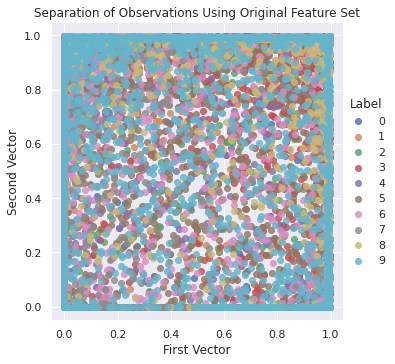

In [ ]:
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,406]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations Using Original Feature Set")

##### 점진적 PCA

데이터셋 크기가 너무 커 저장할 수 없는 경우 점진적으로 PCA을 수행할 수 있습니다.
배치 크기는 수동으로 설정하거나 자동으로 결정한 경우이며 배치 기간 PCA 유형으로
점진적 PCA가 있습니다


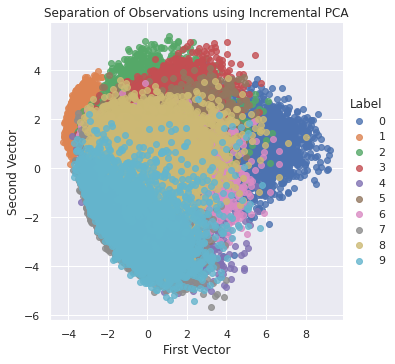

In [ ]:
# 점진적 PCA
from sklearn.decomposition import IncrementalPCA

n_components = 784
batch_size = None

incrementalPCA = IncrementalPCA(n_components=n_components, \
                                batch_size=batch_size)

X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA = \
    pd.DataFrame(data=X_train_incrementalPCA, index=train_index)

X_validation_incrementalPCA = incrementalPCA.transform(X_validation)
X_validation_incrementalPCA = \
    pd.DataFrame(data=X_validation_incrementalPCA, index=validation_index)

scatterPlot(X_train_incrementalPCA, y_train, "Incremental PCA")

##### 희소 PCA
alpha라는 하이퍼파라미터로 제어하여 어느정도의 희소성을 나타내는 pca기법으로 원본 피처 공간을 최대한 조밀하게 줄일 때 사용됩니다.

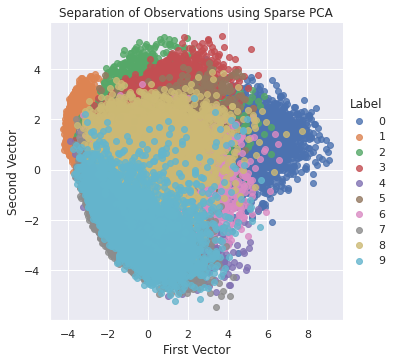

In [ ]:
# 희소 PCA
from sklearn.decomposition import SparsePCA

n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1

# 수정 사항 : normalize_components='deprecated' 옵션을 설정하면 경고메세지가 삭제됨 components 정규화는 무조건 실행 되기 때문에 의미 없는 옵션임
sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:10000,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=train_index)

X_validation_sparsePCA = sparsePCA.transform(X_validation)
X_validation_sparsePCA = \
    pd.DataFrame(data=X_validation_sparsePCA, index=validation_index)

scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")

##### 커널 PCA
마지막 커널 PCA 기법입니다. 
원본 데이터 포인트 쌍들에 대해 유사성 함수를 실행하여 비선형적으로 차원을 축소한다는 점에서 희소PCA와 점진적 PCA와 차이점이 있습니다

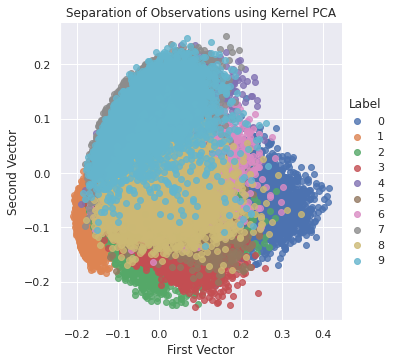

In [ ]:
# 커널 PCA
from sklearn.decomposition import KernelPCA

n_components = 100
kernel = 'rbf'
gamma = None
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
                      gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train.loc[:10000,:])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,index=train_index)

X_validation_kernelPCA = kernelPCA.transform(X_validation)
X_validation_kernelPCA = \
    pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)

scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

### 3.SWISS-ROLL data

대표적인 매니폴드 데이터 예시인 swiss-roll데이터를 가져와보았습니다.

스위스롤의 특징은 3차원의 공간에 롤처럼 말린 형태로 데이터가 분포해있는 것입니다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_swiss_roll

#### big datasets

먼저 기법을 사용하기 이전 swiss-rll 데이터를 3D형태로 가져와 보았습니다. 말린 형태임을 확인하였습니다.

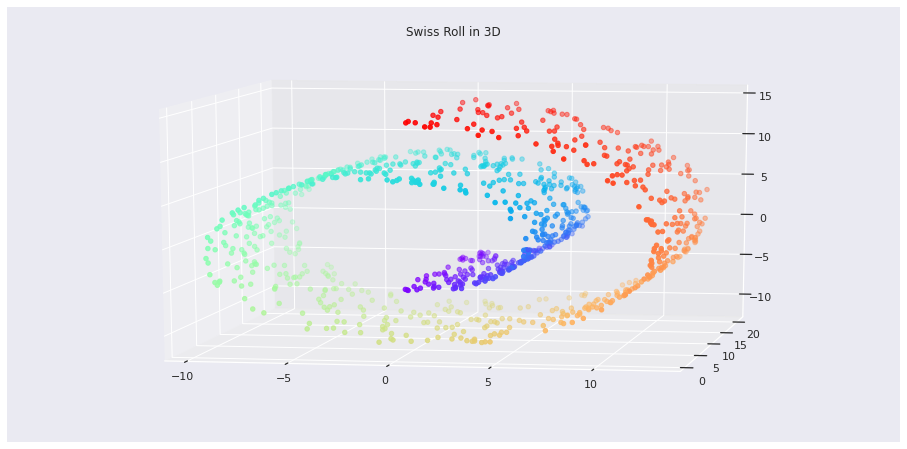

In [ ]:
X, color = make_swiss_roll(n_samples=1000, random_state=2022) #1000개의 점으로 swiss-roll 형태의 데이터를 생성합니다.

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
ax.view_init(10, -80)
plt.title('Swiss Roll in 3D')
plt.show()

#### small datasets

적은 데이터에서의 swiss roll data 3D형태입니다.

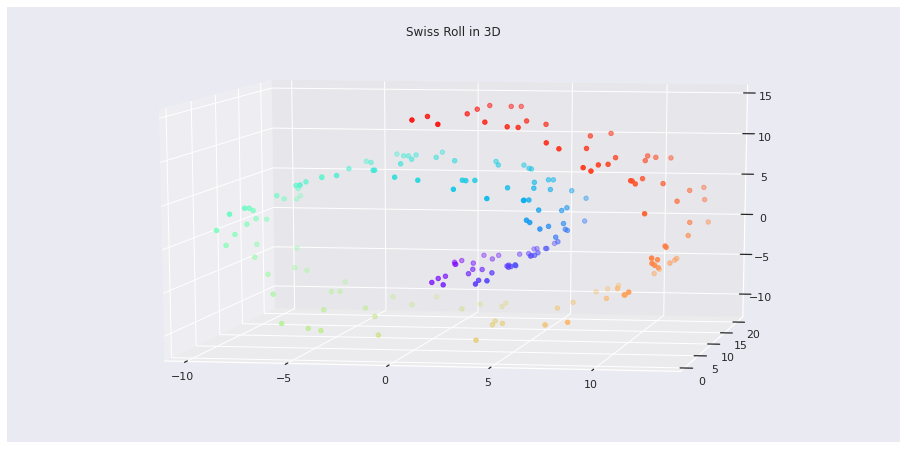

In [ ]:
X, color = make_swiss_roll(n_samples=200, random_state=2022)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
ax.view_init(10, -80)
plt.title('Swiss Roll in 3D')
plt.show()

### 4.SWISS-ROLL data - ISOMAP 

#### big datasets

다음은 ISOMAP 기법을 적용한 결과입니다.
ISOMAP 기법은 geodesic distance를 사용하기 때문에 마치 swiss roll 모형을 펼친듯한 형태로 데이터가 나타나게 됩니다.

지오데식 거리는 커널 PCA 기법과 공통적이며, 모든 데이터 포인트 간의 쌍별 거리를 계산하여 원본 피처셋의
새로운 저차원 임베딩을 학습합니다.

Text(0.5, 1.0, 'Isomap')

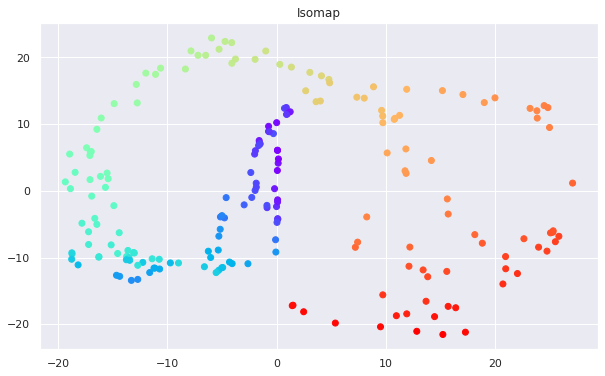

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2) #2차원으로 차원을 축소합니다

X_iso = iso.fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(X_iso[:,0],X_iso[:,1], c=color, cmap=plt.cm.rainbow)
plt.title('Isomap')

#### small datasets

다음으로는 적은 데이터에서의 ISOMAP 기법 결과를 보겠습니다.

ISOMAP은 아래와 같은 상황에서 어려움을 가집니다.

1. 실제 manifold가 convex(볼록한 형태)가 아니고, 특히 구멍을 포함할 때

2. 실제 manifold가 너무 많은 커브를 가질 때

3. 데이터가 너무 노이즈가 많을 때, (측정 에러)

2와 3의 경우에는 그래프에서 지름길을 택하는 오류를 범할 수 있습니다.

아래에서는 manifold를 이루는 점의 개수가 적어서, 마치 구멍을 포함한것처럼 나타나있기 때문에 제대로 데이터가 펼쳐져서 나타나지 않는 모습을 보여주고 있습니다.

Text(0.5, 1.0, 'Isomap')

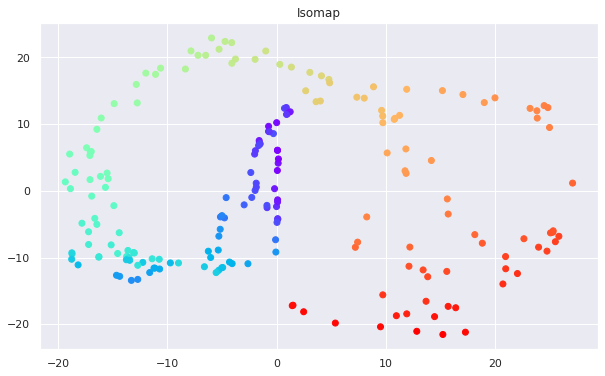

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)

X_iso = iso.fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(X_iso[:,0],X_iso[:,1], c=color, cmap=plt.cm.rainbow)
plt.title('Isomap')

### 5.SWISS-ROLL data - MDS

다차원 스케일링 MDS는 비선형 차원 축소의 한 유형으로 유사성을 학습한뒤 이 결과를 사용하여
더 낮은 차원 공간에서 모델링하는 기법입니다.

#### big datasets

swiss-roll 데이터로 MDS 기법을 학습하였을 때,가까운 점들끼리 뭉치게 되어 마치 swiss roll 모형을 약간 비스듬하게 반으로 자른 형태로 데이터가 나타나게 됩니다.

Text(0.5, 1.0, 'MDS')

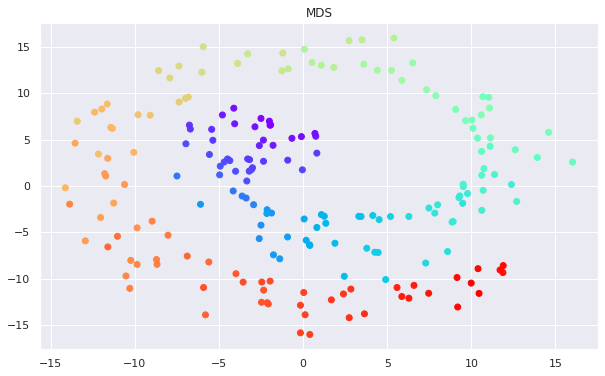

In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=2) #2차원으로 차원을 축소합니다

X_mds = mds.fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(X_mds[:,0],X_mds[:,1], c=color, cmap=plt.cm.rainbow)
plt.title('MDS')

#### small datasets

적은 데이터셋의 MDS 기법 적용 결과입니다.

MDS는 다음과 같은 단점이 있습니다.

MDS 는 모든 점들 간의 거리 정보의 중요도가 같습니다. 따라서 가까운 점들 간의 거리 정보보다 멀리 떨어진 점들 간의 거리 정보의 영향력이 큽니다. 

10 만큼 떨어진 점들 간의 거리가 5 틀리는 것과 1000 만큼 떨어진 점들 간의 거리가 5 만큼 틀리는 것의 중요도는 다르지만, 
MDS 는 이 두 거리차를 동일하게 중요하다고 판단하기 때문에 가까운 점들 간의 위치를 제대로 맞추는데 실패하게 됩니다.

고차원 공간에서의 거리는 가깝다라는 정보를 제외하면 대부분 차별성이 없는 무의미한 큰 값일 가능성이 높지만 MDS 는 무의미한 정보에 집중하여 고차원의 원 공간에서의 가까운 점들 간의 구조를 보존하지 못합니다.

따라서 MDS는 고차원 공간의 시각화에 적합한 방법이 아닙니다. 여기서는 3차원 정도의 저차원이기 때문에 데이터의 개수가 적지만 ISOMAP와 다르게 여전히 잘 분류한 모습을 보이고 있습니다.

Text(0.5, 1.0, 'MDS')

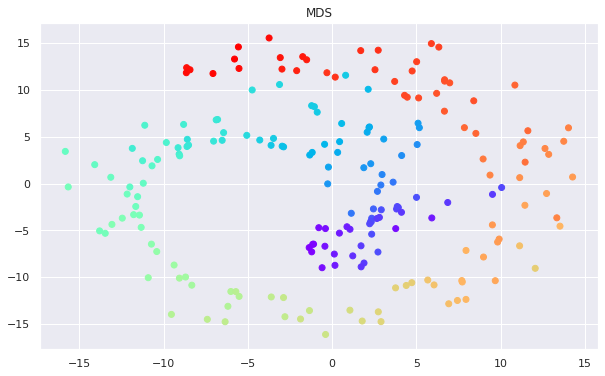

In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)

X_mds = mds.fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(X_mds[:,0],X_mds[:,1], c=color, cmap=plt.cm.rainbow)
plt.title('MDS')

### 결론

지금까지 PCA와 ISOMAP 그리고 MDS 기법의 다양한 데이터셋 활용을 통해 차원 축소 기법의 결과를 비교하고 살펴보았는데요!

차원 축소 기법이지만 방식 유형에 따라 적용 결과가 상이하다는 점에서 해당 특징을 미리 알고, 기법을 사용할 필요가 있습니다.

이번 시간으로 다양한 차원 축소 알고리즘 소개를 마치겠는데요. 차원 축소 기법은 많은 features의 성능 저하를 해결하고 높은 예측력을 준다는 점에서 매우 중요한 기법으로 이를 명심하고 사용하셨으면 좋겠습니다.

다음 포스팅에는 '이상치 탐지' 편으로 찾아뵙겠습니다.

😊감사합니다😊